**Regression analysis of Air Quality Dataset + NN**

---



# Data



**Main link:** 

https://archive.ics.uci.edu/ml/datasets/Air+Quality#


**Data Set Information:**

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.


**Independent Variables:**

* `Date`: (DD/MM/YYYY)
* `Time`: (HH.MM.SS)
* `CO(GT)`: True hourly averaged concentration CO in $mg/m^3$ (reference analyzer)
* `PT08.S1(CO)`: (tin oxide) hourly averaged sensor response (nominally CO targeted)
* `NMHC(GT)`: True hourly averaged overall Non Metanic HydroCarbons concentration in $microg/m^3$ (reference analyzer)
* `PT08.S2(NMHC)`: (titania) hourly averaged sensor response (nominally NMHC targeted)
* `NOx(GT)`: True hourly averaged NOx concentration in ppb (reference analyzer)
* `PT08.S3(NOx)`: (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
* `NO2(GT)`: True hourly averaged NO2 concentration in $microg/m^3$ (reference analyzer)
* `PT08.S4(NO2)`: (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
* `PT08.S5(O3)`: (indium oxide) hourly averaged sensor response (nominally O3 targeted)
* `T`: Temperature in  °C
* `RH`: Relative Humidity (%)
* `AH`: Absolute Humidity

**Target variable:**

* `C6H6(GT)`: True hourly averaged Benzene concentration in $microg/m^3$ (reference analyzer)

**Relevant Papers:**

* S. De Vito, E. Massera, M. Piga, L. Martinotto, G. Di Francia, On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario, Sensors and Actuators B: Chemical, Volume 129, Issue 2, 22 February 2008, Pages 750-757, ISSN 0925-4005, http://dx.doi.org/10.1016/j.snb.2007.09.060

* Saverio De Vito, Marco Piga, Luca Martinotto, Girolamo Di Francia, CO, NO2 and NOx urban pollution monitoring with on-field calibrated electronic nose by automatic bayesian regularization, Sensors and Actuators B: Chemical, Volume 143, Issue 1, 4 December 2009, Pages 182-191, ISSN 0925-4005, http://dx.doi.org/10.1016/j.snb.2009.08.041

* S. De Vito, G. Fattoruso, M. Pardo, F. Tortorella and G. Di Francia, 'Semi-Supervised Learning Techniques in Artificial Olfaction: A Novel Approach to Classification Problems and Drift Counteraction,' in IEEE Sensors Journal, vol. 12, no. 11, pp. 3215-3224, Nov. 2012.
doi: 10.1109/JSEN.2012.2192425


# EDA

## Import

In [1]:
%matplotlib inline

!pip3 install pandas_profiling --upgrade
import pandas as pd
import ydata_profiling

import numpy as np
#import os
#import random
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.graphics.mosaicplot import mosaic

import missingno as msno
#from pathlib import Path

plt.rcParams['figure.figsize'] = 10, 7
plt.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 56.7 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1

### sklearn

In [2]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV,\
    cross_validate, train_test_split, cross_val_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import FunctionTransformer, MinMaxScaler,\
    PolynomialFeatures, PowerTransformer
    
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_absolute_error, r2_score, make_scorer
from sklearn.decomposition import PCA

In [3]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

In [4]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 28.2 MB/s eta 0:00:00


### TF

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


## Read data

In [6]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/Myoth13/datasets/main/AirQualityUCI.csv', 
    delimiter=';', decimal=',', na_values=['-200', -200], 
    )
df.head(100)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14/03/2004,17.00.00,2.9,1438.0,156.0,12.0,1051.0,180.0,943.0,128.0,1668.0,1206.0,21.3,30.8,0.7696,NaN,NaN
96,14/03/2004,18.00.00,2.5,1478.0,122.0,12.2,1055.0,160.0,929.0,121.0,1671.0,1262.0,19.7,36.7,0.8307,NaN,NaN
97,14/03/2004,19.00.00,4.6,1808.0,262.0,20.6,1312.0,261.0,753.0,157.0,1993.0,1698.0,18.4,41.7,0.8732,NaN,NaN
98,14/03/2004,20.00.00,5.9,1898.0,341.0,23.1,1381.0,325.0,681.0,173.0,2103.0,1905.0,17.6,46.1,0.9210,NaN,NaN


In [7]:
df.dropna(subset=['Date','Time'], inplace=True)

In [8]:
df['date'] = df['Date'] + " " + df['Time']
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H.%M.%S')
df.drop(['Date', 'Time'], axis=1, inplace=True)
df = df.sort_values('date').reset_index(drop=True)
df.set_index('date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7674 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   NMHC(GT)       914 non-null    float64
 3   C6H6(GT)       8991 non-null   float64
 4   PT08.S2(NMHC)  8991 non-null   float64
 5   NOx(GT)        7718 non-null   float64
 6   PT08.S3(NOx)   8991 non-null   float64
 7   NO2(GT)        7715 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             8991 non-null   float64
 12  AH             8991 non-null   float64
 13  Unnamed: 15    0 non-null      float64
 14  Unnamed: 16    0 non-null      float64
dtypes: float64(15)
memory usage: 1.1 MB


We can see:


1.   There are two totally empty columns: `Unnamed: 15` and `Unnamed: 16` which we will drop  
2.    Data types are alright  
3.    Column `NMHC(GT)` contains a lot of missing data that needs to be investigated  



Let's begin with dropping two empty columns

In [9]:
df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)

## Uniqness constrains

Let's check for duplicate rows:

In [10]:
df.duplicated().sum()

31

Let's drop them

In [11]:
df.drop_duplicates(inplace=True)

## Missing data

Let's see overall amount of missing values

<Axes: >

Text(0.5, 1.0, 'Percent of non-null values by variable')

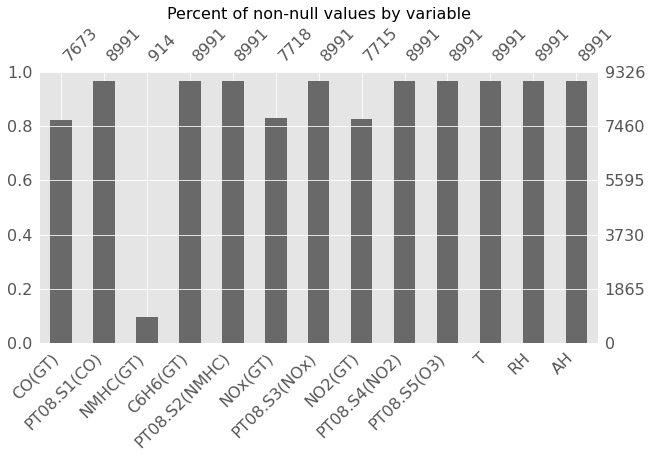

In [12]:
msno.bar(df, figsize=(10, 5))
plt.title('Percent of non-null values by variable', fontsize=16)
plt.show()

We can see, that `NMHC(GT)` has almost 90% of data missing, let's see how model will handle this

In [13]:
#df.drop('NMHC(GT)', axis=1, inplace=True)

Now let's see the pattern of missingness:

<Axes: >

Text(0.5, 1.0, 'Missing values by variable')

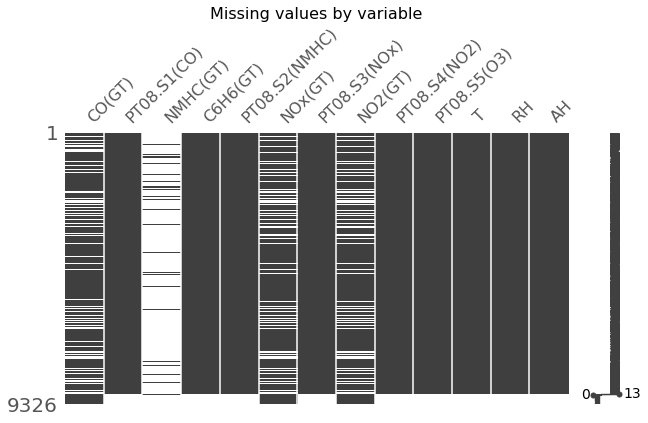

In [14]:
df.sort_values('C6H6(GT)', inplace=True)
msno.matrix(df, figsize=(10, 5))
plt.title('Missing values by variable', fontsize=16)
plt.show()

We can see a very interesting pattern here:
* We have missing data in our target variable and in the same rows almost all features are missing too. This could be the problem with data recording from sensors. I will drop this rows. 
* Missing data in the other variables looks random, so I will impute it later in the pipeline.

In [15]:
df.dropna(subset=['C6H6(GT)'], inplace=True)

## Useless data and constans

Let's check for useless fields:

In [16]:
(df.nunique()/len(df)).sort_values(ascending=False)

AH               0.743299
PT08.S5(O3)      0.193861
PT08.S4(NO2)     0.178289
PT08.S2(NMHC)    0.138472
PT08.S3(NOx)     0.135802
PT08.S1(CO)      0.115782
NOx(GT)          0.099878
RH               0.083750
T                0.048493
NMHC(GT)         0.047492
C6H6(GT)         0.045267
NO2(GT)          0.030475
CO(GT)           0.010455
dtype: float64

There are no unique fields

Let's check for constants - fields with zero variance:

In [17]:
df.var().sort_values(ascending=True)[0:5]

AH            0.163065
CO(GT)        2.063450
C6H6(GT)     55.499814
T            78.006268
RH          299.874765
dtype: float64

We can see here that we don't have zero variance fields which means we don't have constans

## Data range constrains

Let's see the overall statistics:

In [18]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7344.000000,8991.000000,887.000000,8991.000000,8991.000000,7396.000000,8991.000000,7393.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.129711,1099.833166,218.607666,10.083105,939.153376,242.189292,835.493605,112.145137,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.436472,217.080037,206.615130,7.449820,266.831429,206.312007,256.817320,47.629141,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,66.000000,4.400000,734.500000,97.000000,658.000000,77.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,145.000000,8.200000,909.000000,178.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.800000,1231.000000,297.000000,14.000000,1116.000000,321.000000,969.500000,140.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


It looks quite reasonable for me from the first glance, scales are quite different, but I'm not going to use models wich use distance. 

## Target variable

Let's look at the distribution of the target variable:

In [19]:
fig = px.histogram(
    data_frame=df,
    x='C6H6(GT)',
    title='Distribution of the target variable',
    nbins=20,
    width = 600,
    height = 500
    )
fig.show()

Because distribution is not normal and we have some outliers as a metric it would be appropriate to use MAE or MAPE (to optimize for the median, instead on mean with RMSE or RMSPE). But I'm not sure what is the HW requrements. 

## Independent variables

Text(0.5, 0.98, 'Distribution of the numeric variables')

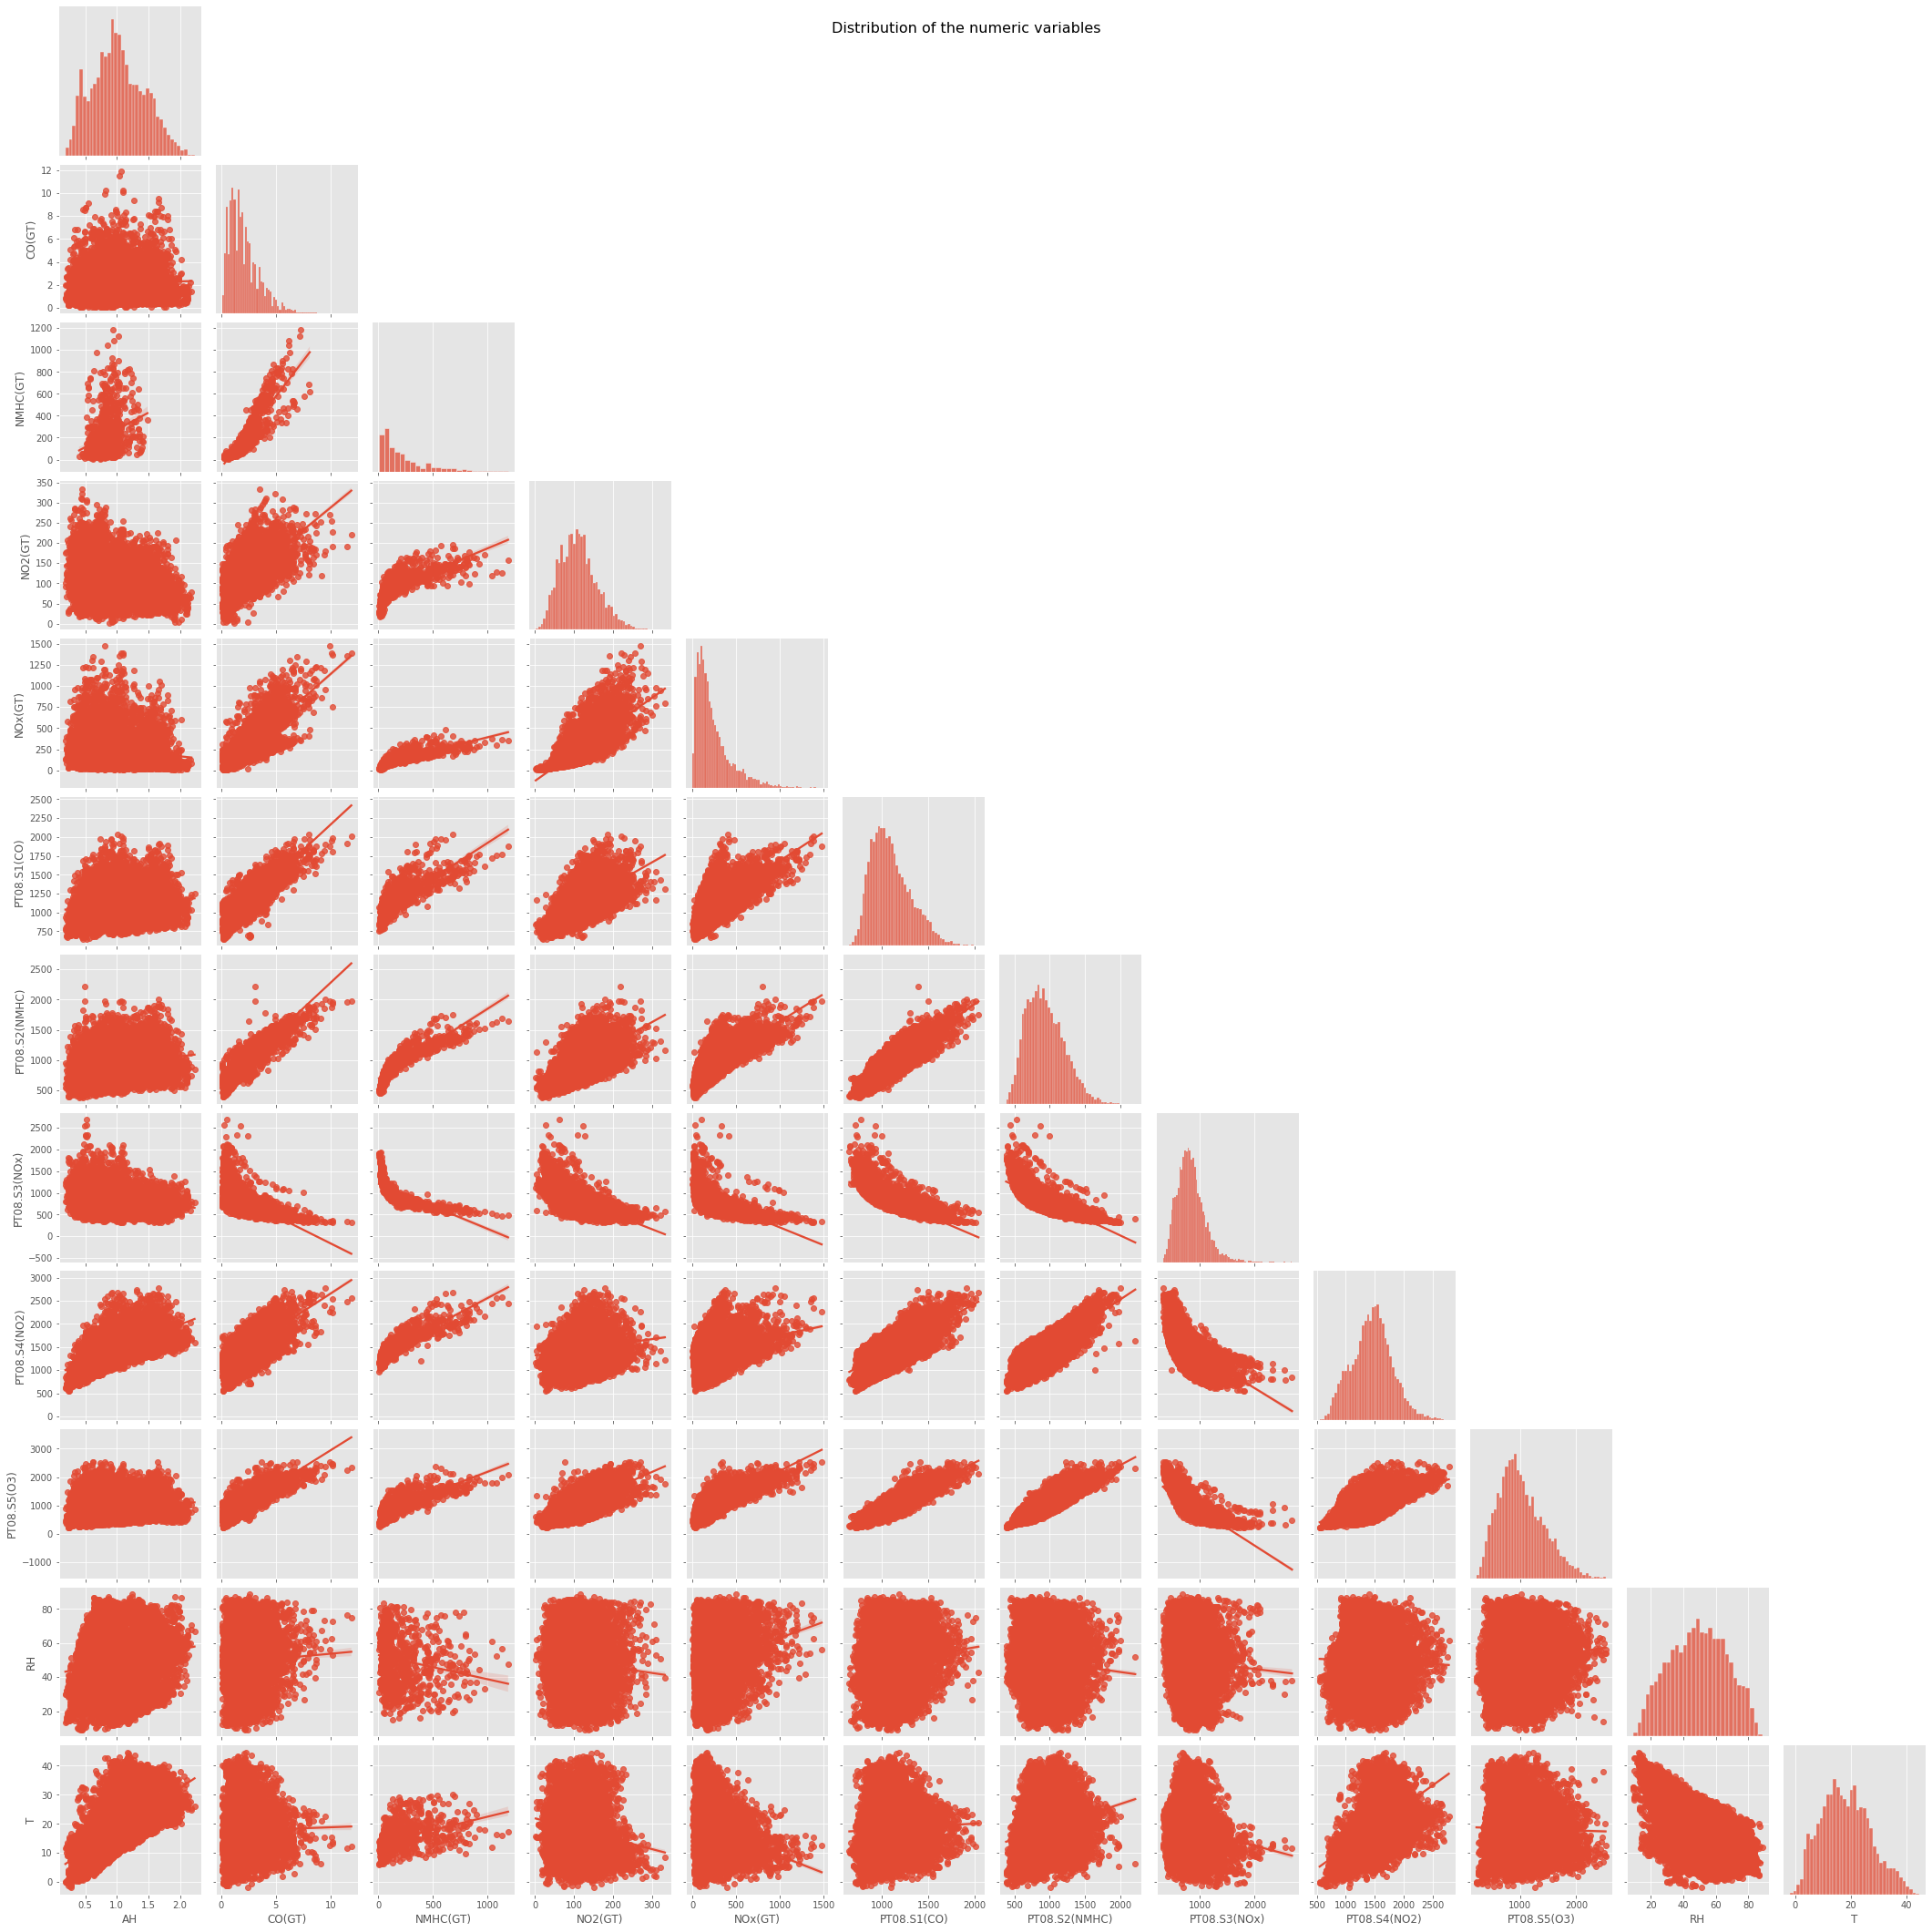

In [20]:
sns.pairplot(df[df.columns.difference(['C6H6(GT)'])], corner=True, kind="reg")
plt.suptitle('Distribution of the numeric variables', fontsize=16)
plt.show()

We can see here:
* All features except for `AH`, `PH` and `T` have a not linear relationship with the target. 

### Correlations

Let's look at the correlations between variables. I will use original dataset, o I will use spearmans correlation coefficient instead of Pearsons because of the non-linearity

<Axes: >

Text(0.5, 1.0, 'Spearmans corr')

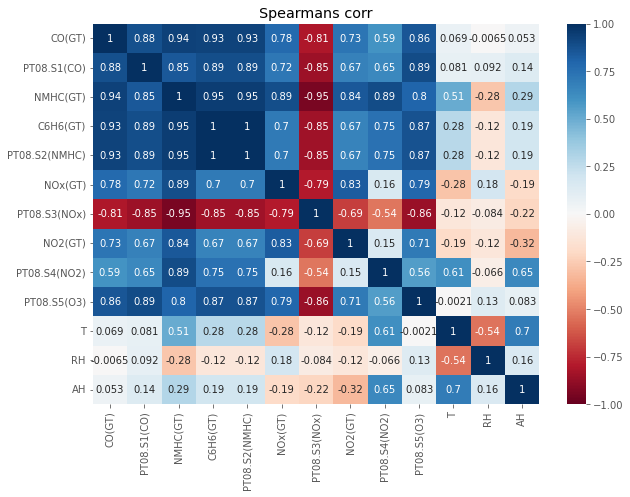

In [21]:
corr_table = df.corr(method='spearman')
sns.heatmap(corr_table, cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Spearmans corr')
plt.show()

We can see here:

* Target variable has perfect correlation with `PT08.S2(NMHC)`: (titania) hourly averaged sensor response (nominally NMHC targeted). Because Benzene is NMHC, it would be reasonable to exclude this variable from analysis all together, otherwise it is not interesting =). But for doing this last time I got by HW scores lowered, may be this time I will avoid it =))?

* A lot of independent variables have strong correlations between each other. 

In [22]:
df.drop(['PT08.S2(NMHC)'], axis=1, inplace=True)

## Profile report

In [23]:
profile = ydata_profiling.ProfileReport(df)
profile.to_file('profile.html')
display(profile)

Output hidden; open in https://colab.research.google.com to view.

## Visualizing the data

In [24]:
df.sort_index(inplace=True)
fig = px.line(
    data_frame=df,
    y='C6H6(GT)',
    title='Distribution of the target variable',
    )
fig.show()

We can see some seasonality here, but because we will use regression, I will not make additional plots to discover trend and seasonalities/cycles here

# Preprocessing

In [25]:
df.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

## Splitting into test and train datasets

Because our dataset has time component, I will use `TimeSeriesSplit` 

<Axes: xlabel='date'>

<Axes: xlabel='date'>

Text(0, 0.5, 'Response variable')

Text(0.5, 1.0, 'Training/test set splitting')

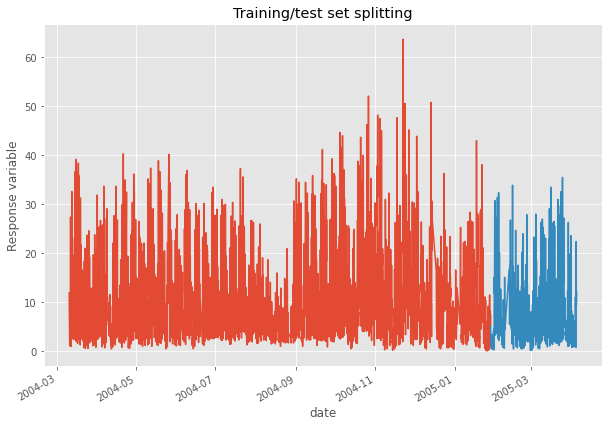

In [26]:
tss = TimeSeriesSplit(n_splits = 5)

y = df['C6H6(GT)']
X = df.drop(['C6H6(GT)'], axis=1)

for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


y_train.plot()
y_test.plot()
plt.ylabel('Response variable')
plt.title('Training/test set splitting')
plt.show()

The training set is older (red) than test set (blue).

## Preprocessor pipeline

I'm using `MinMaxScaler`  because of outliers. As the more robust technique I'm using median strategy for imputing the missing values 

In [27]:
print('Shape before the transformation:')
print(X_train.shape)
print(X_test.shape)

num_log_pipeline = Pipeline([
    ('transform', PowerTransformer()),
    ('scaler', MinMaxScaler()),
    ('imputer', SimpleImputer(strategy='median')),
])

num_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('imputer', SimpleImputer(strategy='median')),
])

preprocessor = ColumnTransformer(
    transformers=[
      ('cat', num_log_pipeline, X.columns.difference(['AH', 'RH', 'T'])),
      ('num', num_pipeline, ['AH', 'RH', 'T']),
    
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
#    ('PCA', PCA(n_components=0.99)),
])

X_train_tr = pipeline.fit_transform(X_train)
X_test_tr = pipeline.transform(X_test)

print('Shape after the transformation:')
print(X_train_tr.shape)
print(X_test_tr.shape)

Shape before the transformation:
(7493, 11)
(1498, 11)
Shape after the transformation:
(7493, 11)
(1498, 11)


We can see here then out of 10 variables 4 is enought to cover 99% of the variance 

# Modelling

## Model evaluation function

For my model evaluation I've chosen two the most popular metrics:
* RMSE because it's in units of response variable (but after log transformation it's quite hard to interpret)
* r2 is explained variance and easy to interpret compare to RMSE

In [28]:
def evaluate_model(pipeline, X_train, y_train, X_test, y_test, cv):
  
  scorers = {
              'mae': make_scorer(mean_absolute_error),
              'r2': make_scorer(r2_score),
            }

  results = cross_validate(estimator=pipeline, X=X_train, y=y_train, cv=cv, 
                           scoring=scorers['mae'], return_train_score=True, 
                           error_score="raise")

  ppl = pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)

  train_score = results['train_score']
  val_score = results['test_score']

  print(f'\nTrain: {train_score.mean():.3f}, Std: {train_score.std():.3f}')
  print(f'Validation: {val_score.mean():.3f}, Std: {val_score.std():.3f}')
  print(f'Test: {mean_absolute_error(y_test, y_pred):.3f}')

  return pipeline

## Baseline model

Let's make a baseline model

In [29]:
%%time 

def objective(space):

    params = space
    
    model = RandomForestRegressor(
        criterion='absolute_error',
        random_state=42,
        n_jobs=-1,
        **params
    )

    ppl = make_pipeline(
        preprocessor,
        model,
    )    

    scorer = make_scorer(mean_absolute_error)

    score = cross_val_score(ppl, X_train, y_train, scoring=scorer, cv=tss, 
                            error_score=10).mean()
    print("score {:.3f} params {}".format(score, params))
    return {'loss': score, 'status': STATUS_OK }

space = {
#      'n_estimators': hp.choice('n_estimators', [100, 200, 300, 500, 1000]),
      'max_depth':  hp.choice('max_depth', [None, 5, 10, 15]),
      'min_samples_split': hp.choice('min_samples_split', [2, 4, 6]),
      'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 3, 4]), 
      'max_features': hp.choice ('max_features', ['auto', 'sqrt', 'log2', 
                                                  0.4, 0.6, 0.8, 1]),
    }

'''best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)'''

CPU times: user 323 µs, sys: 0 ns, total: 323 µs
Wall time: 329 µs


'best = fmin(fn=objective,\n            space=space,\n            algo=tpe.suggest,\n            max_evals=10)'

In [30]:
best_rf = RandomForestRegressor(max_depth=10, min_samples_leaf=1, 
                                min_samples_split=4)

ppl_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_rf)
])

ppl_fr = evaluate_model(ppl_rf, X_train, y_train, X_test, y_test, tss)



Train: 0.404, Std: 0.092
Validation: 1.622, Std: 0.299
Test: 1.834


We can see some overfitting. Let's see feature importances

### Residual analysis

Text(0.5, 0, 'Predicted Values')

Text(0, 0.5, 'Residuals')

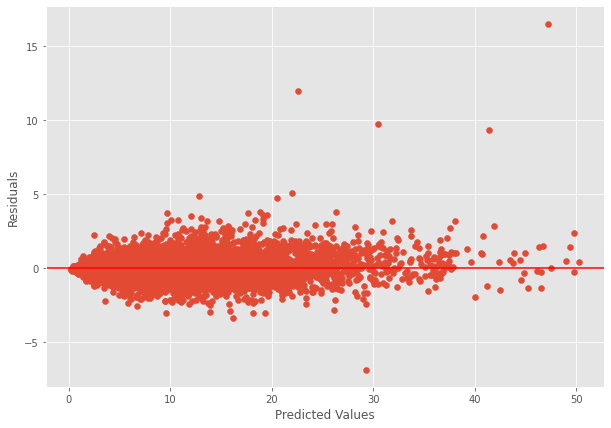

In [31]:
y_pred = ppl_rf.predict(X_train)
resid = y_train - y_pred
plt.scatter(x=y_pred, y=resid)
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.show()

Looks alright

### Feature importances

<Axes: >

Text(0.5, 1.0, 'Feature importances')

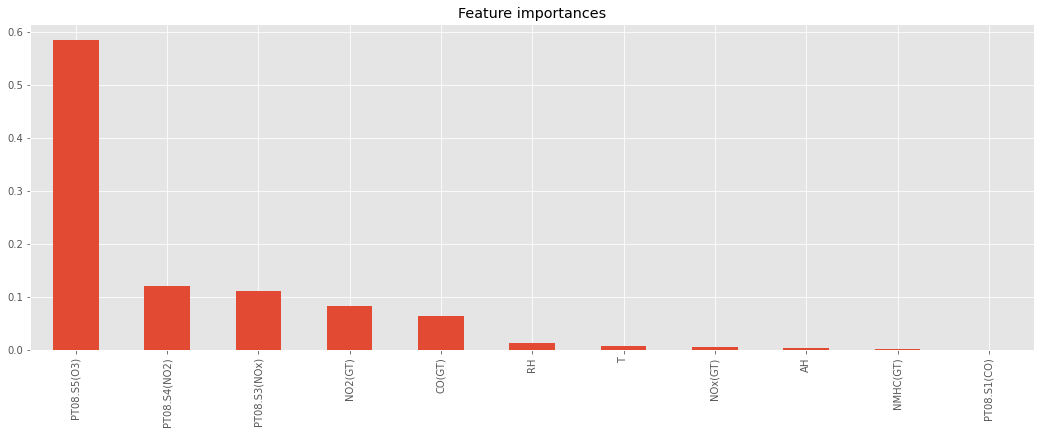

In [32]:
#explainer = shap.Explainer(ppl_rf.named_steps['model'])
#shap_values = explainer(X_train)
#shap.plots.waterfall(shap_values[0])

feature_importance = pd.Series(index = X_train.columns, data = ppl_rf.named_steps['model'].feature_importances_)

feature_importance.sort_values(ascending=False).plot(kind = 'bar', figsize = (18,6))
plt.title('Feature importances')

The most important feature now is ozone level. 

## NN

In [54]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

input_tensor = Input(shape=(11,))

hidden_tensor0 = Dense(
    250, 
    kernel_initializer='normal', 
    activation='relu',
    kernel_regularizer='l2')(input_tensor)

hidden_tensor1 = Dense(
    500, 
    kernel_initializer='normal', 
    activation='relu',
    kernel_regularizer='l2')(hidden_tensor0)

hidden_tensor2 = Dense(
    300, 
    kernel_initializer='normal', 
    activation='relu',
    kernel_regularizer='l2')(hidden_tensor1)

output_tensor = Dense(
    1, 
    kernel_initializer='normal', 
    activation='linear')(hidden_tensor2)

model = Model(input_tensor, output_tensor)

from sklearn.metrics import r2_score

model.compile(optimizer='adam', loss='mae')

In [55]:
%%time 
history = model.fit(X_train_tr, y_train, epochs=500, batch_size=128, 
                    validation_split=.20, verbose=True, 
                    callbacks = [early_stopping])

Epoch 1/500
47/47 [==============================] - 1s 12ms/step - loss: 10.2463 - val_loss: 6.3854
Epoch 2/500
47/47 [==============================] - 1s 13ms/step - loss: 3.8844 - val_loss: 3.1732
Epoch 3/500
47/47 [==============================] - 1s 15ms/step - loss: 2.4295 - val_loss: 2.3368
Epoch 4/500
47/47 [==============================] - 1s 19ms/step - loss: 2.0437 - val_loss: 2.1920
Epoch 5/500
47/47 [==============================] - 1s 20ms/step - loss: 1.8382 - val_loss: 2.2273
Epoch 6/500
47/47 [==============================] - 1s 20ms/step - loss: 1.7767 - val_loss: 1.8832
Epoch 7/500
47/47 [==============================] - 1s 20ms/step - loss: 1.6167 - val_loss: 2.0929
Epoch 8/500
47/47 [==============================] - 1s 20ms/step - loss: 1.5452 - val_loss: 1.8821
Epoch 9/500
47/47 [==============================] - 1s 17ms/step - loss: 1.4825 - val_loss: 1.8431
Epoch 10/500
47/47 [==============================] - 1s 16ms/step - loss: 1.4792 - val_loss: 1.733

In [61]:
print(f'MAE of the train data: {history.history["loss"][-1]:.3f}')
print(f'MAE of the validation data: {history.history["val_loss"][-1]:.3f}')
y_pred = model.predict(X_test_tr)
print(f'MAE of the test data: {mean_absolute_error(y_test, y_pred):.3f}')

MAE of the train data: 1.232
MAE of the validation data: 1.771
47/47 [==============================] - 0s 3ms/step
MAE of the test data: 2.099


Result is worse than the baseline model and much less stable

### Residual analysis

235/235 [==============================] - 0s 2ms/step


Text(0.5, 0, 'Predicted Values')

Text(0, 0.5, 'Residuals')

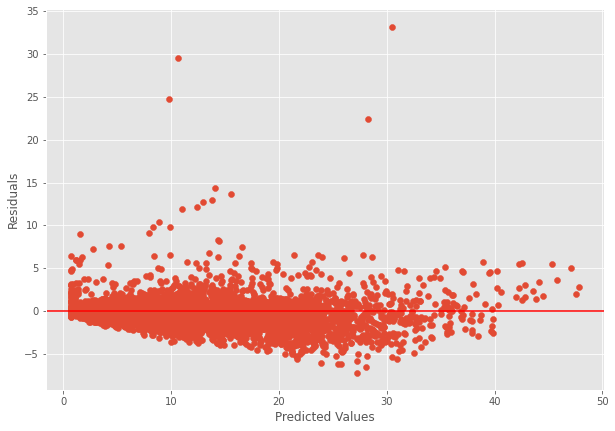

In [52]:
y_pred = model.predict(X_train_tr)
resid = y_train.values.reshape(-1,1) - y_pred
plt.scatter(x=y_pred, y=resid)
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.show()

Residuals look quite similar to the baseline model

### Training statistics

Text(0.5, 0, 'Epoch Number')

Text(0, 0.5, 'Loss')

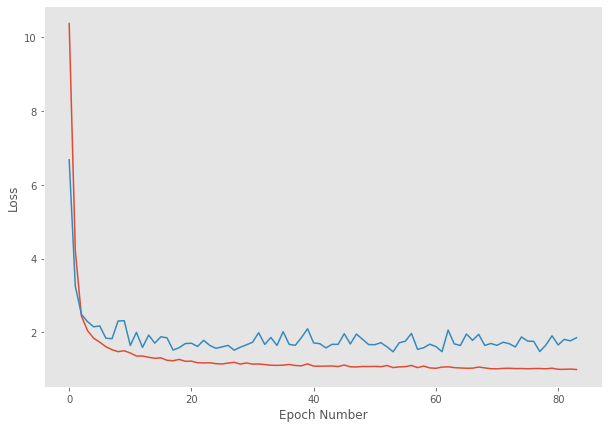

In [53]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.show()

We can see, that after around 25th epochs it starts to overfit.

# Conclusion

I don't think NN is a good tool for the regression analysis because its very easy to overfit and 'blackbox' nature of the model makes it hard to analyse